<a href="https://colab.research.google.com/github/Anu0517/Metadata-Tagging-NER/blob/main/metadata_tagging_ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Requirements
!pip install spacy pandas numpy -q
!python -m spacy download en_core_web_sm -q

# Importing
!pip install spacy pandas numpy -q
!python -m spacy download en_core_web_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 92.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
# Importing
import spacy
import pandas as pd

In [9]:
# Load the dataset
try:
    train_data = pd.read_csv('Data_Train.csv', encoding='utf-8')
    test_data = pd.read_csv('Data_Test.csv', encoding='utf-8')
except UnicodeDecodeError:
    train_data = pd.read_csv('Data_Train.csv', encoding='latin-1')
    test_data = pd.read_csv('Data_Test.csv', encoding='latin-1')

print(train_data.head())

                                               STORY  SECTION
0  But the most painful was the huge reversal in ...        3
1  How formidable is the opposition alliance amon...        0
2  Most Asian currencies were trading lower today...        3
3  If you want to answer any question, click on ...        1
4  In global markets, gold prices edged up today ...        3


In [17]:
# Preprocessing
train_data['text'] = train_data['STORY'].fillna('')
test_data['text'] = test_data['STORY'].fillna('')

sample_size = 10000
if sample_size > len(train_data):
  train_data = train_data.sample(n=len(train_data), random_state=42)
else:
  train_data = train_data.sample(n=sample_size, random_state=42)

print(train_data['text'].head())

5093    According the present seat-sharing arrangement...
5091    "In view of the admitted facts and material av...
5728    Realme 2 Pro, Samsung Galaxy S8, Oppo F9, Poco...
2483    Several Congress leaders have refused to overc...
2909    A recent Amazon job posting, seeking a quality...
Name: text, dtype: object


In [13]:
print(f"Training set size: {len(train_data)}, Test set size: {len(test_data)}")

Training set size: 7628, Test set size: 2748


In [18]:
# Feature Extraction and Model Training
nlp = spacy.load('en_core_web_sm')

# Function to process text and extract entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply to training data
train_data['entities'] = train_data['text'].apply(extract_entities)
print(train_data['entities'].head())

5093    [(SP, ORG), (BSP, ORG), (RLD, ORG), (at least ...
5091    [(Shri Narendra Modi, PERSON), (the Lok Sabha,...
5728    [(Realme 2 Pro, ORG), (Samsung Galaxy S8, ORG)...
2483    [(Congress, ORG), (Sumalatha Amarnath's, PERSO...
2909    [(Amazon, ORG), (Alexa Data Services, ORG), (B...
Name: entities, dtype: object


In [19]:
# Testing
# Extract all PERSON entities as an example
def filter_entities(df, entity_type=None):
    if entity_type:
        return [ent for sent in df['entities'] for ent in sent if ent[1] == entity_type]
    return [ent for sent in df['entities'] for ent in sent]

person_entities = filter_entities(train_data, 'PERSON')
print(f"Number of PERSON entities: {len(person_entities)}")
print(person_entities[:10])

test_data['entities'] = test_data['text'].apply(extract_entities)
test_person_entities = filter_entities(test_data, 'PERSON')
print(f"Number of PERSON entities in test set: {len(test_person_entities)}")

Number of PERSON entities: 15183
[('Rae Bareli', 'PERSON'), ('Rahul Gandhi', 'PERSON'), ('Sonia Gandhi', 'PERSON'), ('Shri Narendra Modi', 'PERSON'), ('Oppo F9', 'PERSON'), ("Sumalatha Amarnath's", 'PERSON'), ('Sumalatha', 'PERSON'), ('Kumaraswamy', 'PERSON'), ('you\x92ve', 'PERSON'), ('\x93Do', 'PERSON')]
Number of PERSON entities in test set: 5453


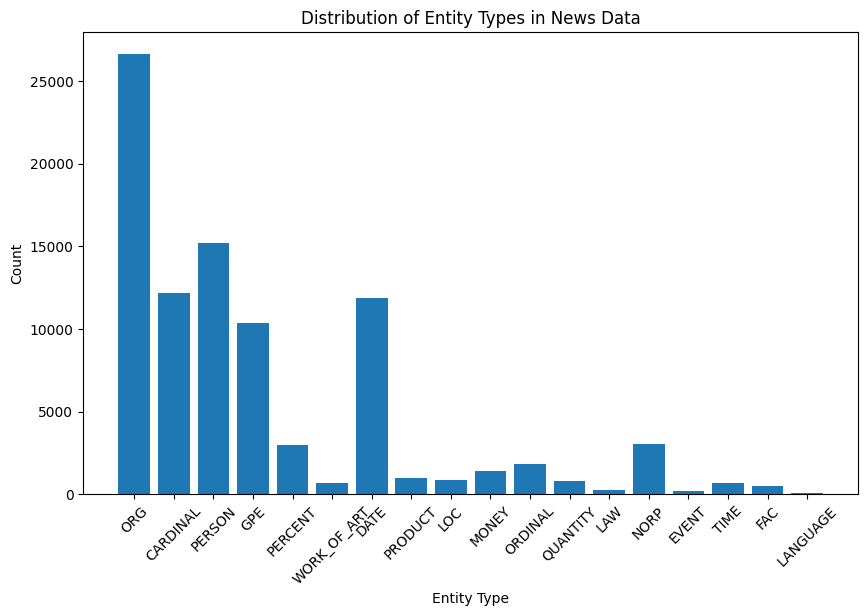

In [20]:
# Visualization
import matplotlib.pyplot as plt

# Count entity types in train_data
entity_counts = {}
for entities in train_data['entities']:
    for ent_text, ent_label in entities:
        entity_counts[ent_label] = entity_counts.get(ent_label, 0) + 1

plt.figure(figsize=(10, 6))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title('Distribution of Entity Types in News Data')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()